In [1]:
from accelerator import *

import numpy as np
import matplotlib.pyplot as plt

# matching the lattice of the first tutorial to get a beta max of 300 meters

In [2]:
cirumference = 1000  # meters
proton_energy = 15  # GeV
dipole_length = 5  # meters
dipole_B_max = 2  # T

In [3]:
n_cells = 8  # ??
dipole_angle = np.pi / 16  # ??

In [4]:
cell_length = cirumference / n_cells
drift = Drift(cell_length / 6)
dipole_thin = DipoleThin(dipole_angle)

In [5]:
quad_focal_length = 2 / 8.89e-3

In [6]:
quad_f_thin = QuadrupoleThin(quad_focal_length, name="quad_thin_f")
quad_d_thin = QuadrupoleThin(-quad_focal_length, name="quad_thin_d")
# We take the same FODO as exercise 1 and add some quadupoles
FODO_thin = Lattice([quad_f_thin,
                     drift,
                     dipole_thin,
                     drift,
                     dipole_thin,
                     drift,
                     quad_d_thin,
                     drift,
                     dipole_thin,
                     drift,
                     dipole_thin,
                     drift])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='s [m]'>)

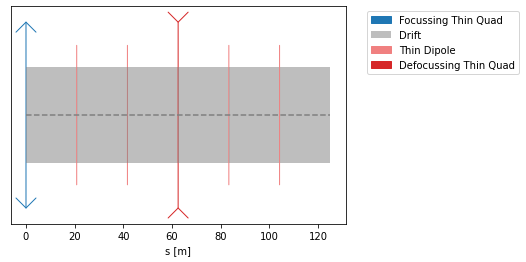

In [7]:
FODO_thin.plot()

In [8]:
FODO_thin.m_h.twiss.invariant

array([[ 5.17460257e+02],
       [-1.15005542e+00],
       [ 4.48851374e-03]])

In [9]:
FODO_thin.constraints.add_target('quad_thin_f', [300, None, None], init='twiss_solution', plane='h')
FODO_thin.constraints.add_free_parameter('quad_thin_f', "f")
FODO_thin.constraints.add_free_parameter('quad_thin_d', "f")

In [10]:
%time matched, opt_res = FODO_thin.constraints.match()

CPU times: user 84.4 ms, sys: 0 ns, total: 84.4 ms
Wall time: 82.5 ms


In [11]:
opt_res

 final_simplex: (array([[ 194.38222785, -255.31945265],
       [ 194.38227556, -255.31954996],
       [ 194.38225034, -255.31949852]]), array([1.88322247e-10, 2.68073563e-10, 4.21266577e-10]))
           fun: 1.8832224668585695e-10
       message: 'Optimization terminated successfully.'
          nfev: 126
           nit: 68
        status: 0
       success: True
             x: array([ 194.38222785, -255.31945265])

In [12]:
matched.m_h.twiss.invariant

array([[ 3.00000000e+02],
       [-7.71675485e-01],
       [ 5.31827685e-03]])

In [13]:
beta, _, _, s = matched.transport(matched.m_h.twiss.invariant)

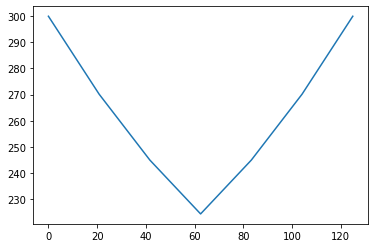

In [14]:
plt.plot(s, beta)

# the matching example in the docstring matching the minimum beta

In [15]:
lat = Lattice([QuadrupoleThin(1.6, name='quad_f'),
               Drift(1),
               QuadrupoleThin(-0.8, name='quad_d'),
               Drift(1),
               QuadrupoleThin(1.6, name='quad_f')])
lat.constraints.add_free_parameter("quad_f", "f")
lat.constraints.add_free_parameter("quad_d", "f")
lat.constraints.add_target("quad_d", [0.5, None, None], "twiss_solution", "h")
%time matched, opt_res = lat.constraints.match()

CPU times: user 36.2 ms, sys: 0 ns, total: 36.2 ms
Wall time: 35.6 ms


In [16]:
opt_res

 final_simplex: (array([[ 1.31905279, -0.91813084],
       [ 1.31905678, -0.91803312],
       [ 1.31905318, -0.91812127]]), array([1.17692656e-09, 1.54066582e-09, 2.41138265e-09]))
           fun: 1.1769265562122655e-09
       message: 'Optimization terminated successfully.'
          nfev: 84
           nit: 46
        status: 0
       success: True
             x: array([ 1.31905279, -0.91813084])

In [17]:
matched

Lattice([QuadrupoleThin(f=1.3190527861614934, name='quad_f'), Drift(l=1, name='drift_1'), QuadrupoleThin(f=-0.9181308379887323, name='quad_d'), Drift(l=1, name='drift_2'), QuadrupoleThin(f=1.3190527861614934, name='quad_f')])

In [18]:
beta, _, _, s = matched.transport(matched.m_h.twiss.invariant)

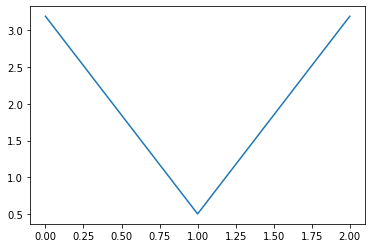

In [19]:
plt.plot(s, beta)

# Same thing but now with constraints to set both strengths to be equal

In [20]:
lat = Lattice([QuadrupoleThin(1.6, name='quad_f'),
               Drift(1),
               QuadrupoleThin(-0.8, name='quad_d'),
               Drift(1),
               QuadrupoleThin(1.6, name='quad_f')])
lat.constraints.add_free_parameter("quad_f", "f")
lat.constraints.add_free_parameter("quad_d", "f")
lat.constraints.add_target("quad_d", [0.5, None, None], "twiss_solution", "h")

In [21]:
# The constraint can be read a quad_f.f + 2*quad_d.f == 0
%time matched, opt_res = lat.constraints.match(constraints=({'type':'eq', 'fun': lambda x: x[0] + 2*x[1]}))

CPU times: user 20.2 ms, sys: 0 ns, total: 20.2 ms
Wall time: 19.6 ms


In [22]:
opt_res

     fun: 1.1503913377453046e-09
     jac: array([-1.0087634 ,  0.03753218])
 message: 'Optimization terminated successfully'
    nfev: 44
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([ 1.32948354, -0.66474177])

In [23]:
matched

Lattice([QuadrupoleThin(f=1.3294835420780677, name='quad_f'), Drift(l=1, name='drift_3'), QuadrupoleThin(f=-0.6647417710390339, name='quad_d'), Drift(l=1, name='drift_4'), QuadrupoleThin(f=1.3294835420780677, name='quad_f')])

In [24]:
beta, _, _, s = matched.transport(matched.m_h.twiss.invariant)

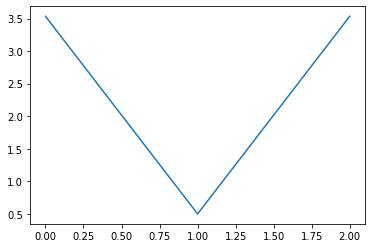

In [25]:
plt.plot(s, beta)

# case where there is no twiss solution, failure expected

In [26]:
lat = Lattice([Drift(1)])
lat.constraints.add_target('drift', [10, None, None], 'twiss_solution', plane='h')
lat.constraints.add_free_parameter('drift', "l")

In [27]:
lat.constraints.match()

/home/lcoyle/.cache/pypoetry/virtualenvs/accelerator-7M8YfYAd-py3.8/lib/python3.8/site-packages/scipy/optimize/optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


(Lattice([Drift(l=1.0, name='drift_5')]),
  final_simplex: (array([[1.],
        [1.]]), array([inf, inf]))
            fun: inf
        message: 'Maximum number of function evaluations has been exceeded.'
           nfev: 200
            nit: 67
         status: 1
        success: False
              x: array([1.]))